[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.1 Vergleich E-Control

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.econtrol as econ

FLUCCOplus.config  loaded!
FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:
E_CONTROL_XLSX = FLUCCOplus.config.DATA_RAW / "e-control" / "BStGes-JR1_Bilanz.xlsx"


ec_raw = econ.parse_econtrol(E_CONTROL_XLSX)

parse_econtrol took 0:00:00.769092 for (20, 22) df


In [5]:
ec = (ec_raw
            .pipe(econ.start_pipeline)
            .pipe(econ.clean_colnames)
            )

ec.round(1)

start_pipeline took 0:00:00 for (20, 22) df
clean_colnames took 0:00:00.001040 for (20, 22) df


,Laufkraftwerke,Speicherkraftwerke,Wasserkraft,FossileBrennstoffeundDerivate,BiogeneBrennstoffe,Wärmekraftwerke,Windkraftwerke,Photovoltaik,Geothermie,WindkraftwerkePhotovoltaikGeothermie,...,BruttoStromerzeugung,PhysikalischeImporte,AufbringungVerwendung,PhysikalischeExporte,Inlandstromverbrauch,VerbrauchfürPumpspeicher,Inlandstromverbrauch3,KWeigenbedarf,Netzverluste,Endverbrauch1
2000,31047.9,12413.0,43461.0,16198.3,431.0,18269.7,67.5,0.0,0.0,67.5,...,61798.1,13920.0,75718.1,15216.1,60502.0,1990.4,58511.6,1566.3,3194.713731,53750.6
2001,29395.0,12336.4,41731.3,18235.1,437.1,20415.7,106.1,0.0,0.0,106.1,...,62253.1,14466.3,76719.4,14378.0,62341.3,1993.9,60347.4,1753.3,3685.974485,54908.1
2002,29915.8,12349.8,42265.6,18425.4,387.6,20293.7,202.9,3.3,3.0,209.1,...,62452.0,15712.5,78164.5,14586.1,63578.5,2505.8,61072.7,1828.3,3347.110859,55897.3
2003,23754.7,11879.9,35634.6,22406.8,595.3,24484.8,365.8,10.6,3.0,379.3,...,60617.6,19001.6,79619.2,13389.0,66230.2,2922.4,63307.9,1977.5,3474.740444,57855.7
2004,27440.8,12467.7,39908.5,21743.2,1009.7,24326.9,924.0,12.8,2.5,939.3,...,64856.7,16628.6,81485.3,13548.3,67937.0,3043.2,64893.8,1968.3,3462.680682,59462.8
2005,26972.3,12602.0,39574.3,23028.9,1462.9,26126.1,1331.4,12.9,2.3,1346.7,...,66735.3,20355.4,87090.7,17732.0,69358.7,3275.7,66083.0,2051.4,3566.772074,60464.9
2006,26574.4,11464.5,38038.9,20570.8,2404.9,24680.1,1751.6,11.5,3.1,1766.2,...,64364.4,20924.8,85289.3,14580.4,70708.9,3335.6,67373.2,2015.5,3530.534815,61827.2
2007,27182.1,12020.4,39202.5,18746.4,2905.4,23378.3,2035.8,20.6,2.4,2058.8,...,64853.0,21783.1,86636.1,15766.7,70869.4,2986.1,67883.3,1944.6,3700.143211,62238.5
2008,28355.4,12360.3,40715.6,19351.0,3128.9,24172.0,2010.8,18.8,1.6,2031.2,...,66927.3,19795.3,86722.6,14933.6,71789.0,3272.7,68516.3,1919.7,3685.705575,62910.9
2009,29635.5,14014.6,43650.1,18488.1,3151.9,23359.5,1953.6,24.0,1.5,1979.2,...,69062.6,19542.1,88604.7,18761.9,69842.8,3961.0,65881.9,1862.3,3520.192216,60499.4


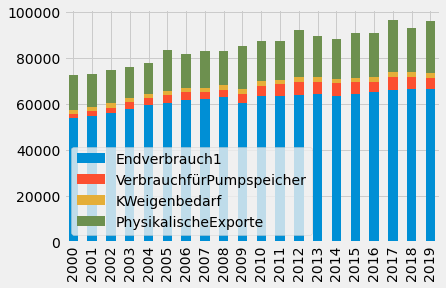

plot_stacked took 0:00:00.359720 for (20, 5) df
plot_stacked took 0:00:00.594413 for (20, 9) df


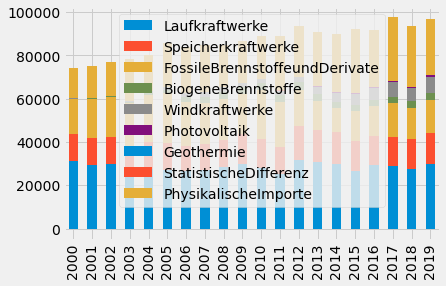

,Laufkraftwerke,Speicherkraftwerke,FossileBrennstoffeundDerivate,BiogeneBrennstoffe,Windkraftwerke,Photovoltaik,Geothermie,StatistischeDifferenz,PhysikalischeImporte
2000,31047.910958,12413.046608,16198.308618,431.045000,67.466000,0.000000,0.000000,0.000000,13920.031811
2001,29394.966965,12336.365287,18235.059733,437.063000,106.074000,0.000000,0.000000,0.000000,14466.304044
2002,29915.827000,12349.754000,18425.352000,387.587888,202.905240,3.264024,2.964720,-316.432601,15712.514979
2003,23754.682477,11879.929000,22406.844000,595.263506,365.818692,10.554750,2.970448,118.894936,19001.554117
2004,27440.819244,12467.726000,21743.183000,1009.681032,924.004297,12.803950,2.468844,-318.040171,16628.570049
2005,26972.336820,12601.996000,23028.932000,1462.892786,1331.440773,12.947851,2.301923,-311.814198,20355.431256
2006,26574.414503,11464.505000,20570.806000,2404.889664,1751.611864,11.545279,3.060530,-120.784288,20924.826453
2007,27182.071159,12020.435467,18746.387795,2905.355009,2035.802949,20.630460,2.410255,213.348191,21783.088414
2008,28355.352322,12360.258940,19351.026865,3128.851590,2010.782217,18.784040,1.615838,8.421902,19795.313811
2009,29635.498372,14014.581828,18488.086173,3151.935985,1953.623448,24.040952,1.510890,73.869352,19542.063735


In [6]:
econ.plot_stacked(ec[econ.pc_uses])
econ.plot_stacked(ec[econ.pp_carriers])

In [7]:

#importe exporte vergessen

### Setup

In [8]:
import FLUCCOplus.electricitymap as elmap

em = elmap.preprocess()
em.info()

read_raw took 0:00:00.209173
start_pipeline took 0:00:00.004022 for (17505, 83) df
read_raw took 0:00:00.289130
start_pipeline took 0:00:00.001031 for (26304, 18) df
start_pipeline took 0:00:00.001996 for (26304, 18) df
preprocess took 0:00:00.559141
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43809 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon_intensity_avg                     43663 non-null  float64
 1   power_consumption_battery_discharge_avg  26304 non-null  float64
 2   power_consumption_biomass_avg            43663 non-null  float64
 3   power_consumption_coal_avg               43663 non-null  float64
 4   power_consumption_gas_avg                43663 non-null  float64
 5   power_consumption_geothermal_avg         43663 non-null  float64
 6   power_consumption_hydro_avg 

In [54]:
import FLUCCOplus.econtrol as econ
compare = {
    "total_production_avg": 'Bruttoerzeugung',
    "total_consumption_avg":'Inlandstromverbrauch',
    "total_import_avg":     'PhysikalischeImporte',
    "total_export_avg":     'PhysikalischeExporte',

    }

emc = (em[compare.keys()]
       .groupby(em.index.year)
       .sum().round(-3)/1000
       )
emc

,total_production_avg,total_consumption_avg,total_import_avg,total_export_avg
datetime,,,,
2015,49361.0,60190.0,27187.0,15476.0
2016,49178.0,60880.0,23672.0,14892.0
2017,54076.0,63459.0,26750.0,18944.0
2018,51063.0,63498.0,24477.0,14230.0
2019,54194.0,59521.0,21082.0,17915.0


In [71]:
ecc = ec.loc[2015:2019,compare.values()].round()
ecc

,Bruttoerzeugung,Inlandstromverbrauch,PhysikalischeImporte,PhysikalischeExporte
2015,64762.0,74823.0,29389.0,19328.0
2016,67919.0,75079.0,26366.0,19207.0
2017,70710.0,77256.0,29362.0,22817.0
2018,67980.0,76927.0,28076.0,19129.0
2019,73460.0,76589.0,26047.0,22918.0


In [95]:
emc["total_consumption_avg"]+emc["total_import_avg"]

datetime
2015    87377.0
2016    84552.0
2017    90209.0
2018    87975.0
2019    80603.0
dtype: float64

In [93]:
emc["total_production_avg"]+emc["total_export_avg"]

datetime
2015    64837.0
2016    64070.0
2017    73020.0
2018    65293.0
2019    72109.0
dtype: float64

In [97]:
ecc["Bruttoerzeugung"]-ecc["PhysikalischeExporte"], emc["total_production_avg"]+emc["total_import_avg"]

(2015    45434.0
 2016    48712.0
 2017    47893.0
 2018    48851.0
 2019    50542.0
 dtype: float64,
 datetime
 2015    76548.0
 2016    72850.0
 2017    80826.0
 2018    75540.0
 2019    75276.0
 dtype: float64)

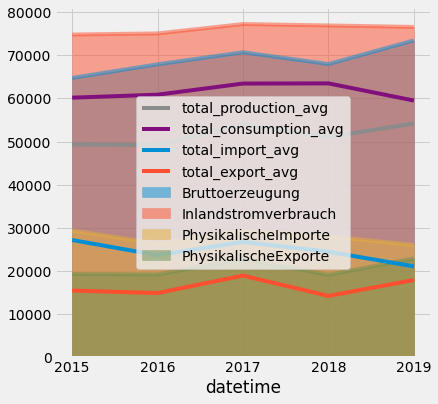

In [75]:
fig, ax = plt.subplots(figsize=(6,6))
ecc.plot.area(stacked=False, ax=ax)
emc.plot(stacked=False, ax=ax)
plt.legend()

datetime
2015    48479.0
2016    52100.0
2017    55653.0
2018    53251.0
2019    56354.0
dtype: float64

In [ ]:
# factors = pd.read_excel("data/szenarien_w2s.xlsx",
#                    sheet_name="factors",
#                    index_col=1)
# scenarios = scale_to_scenario(df=df, factors=factors)

Columns only in 15-17



In [ ]:
# factors = pd.read_excel("data/szenarien_w2s.xlsx",
#                    sheet_name="factors",
#                    index_col=1)
# scenarios = scale_to_scenario(df=df, factors=factors)